# Лабораторная работа 3

## Задание 1

Считайте данные из файла 'winemag-data-130k-v2.csv'. 
а) Постройте точечный график (Scatter plot), по оси х отложите points, а по y - price.
б) Постройте график Barplot количества вин по странам.

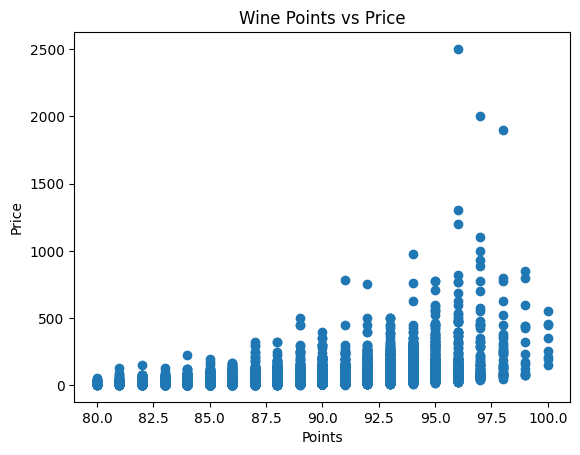

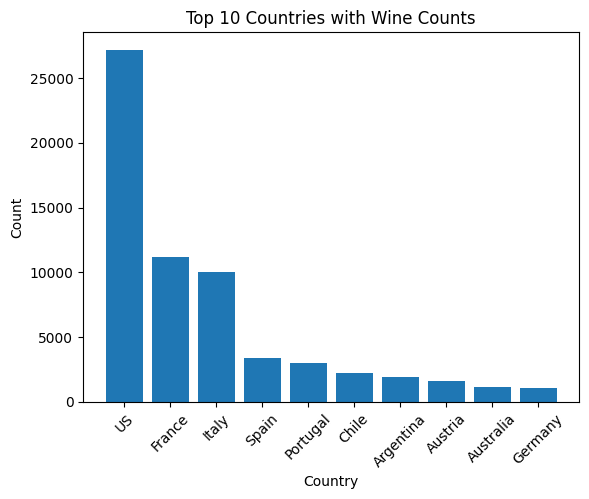

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../data/winemag-data-130k-v2.csv')
plt.scatter(data['points'], data['price'])
plt.xlabel('Points')
plt.ylabel('Price')
plt.title('Wine Points vs Price')
plt.show()

country_counts = data['country'].value_counts().head(10)  # Выберите топ-10 стран с наибольшим количеством вин
plt.bar(country_counts.index, country_counts.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries with Wine Counts')
plt.xticks(rotation=45)
plt.show()

## Задание 2

Постройте поверхность $f(x,y)=\ln ({{x}^{2}}+{{y}^{2}}-xy)$ на $x,y\in [1,2]$

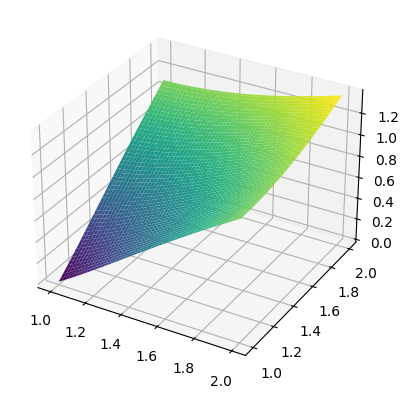

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(1, 2, 100)
y = np.linspace(1, 2, 100)
X, Y = np.meshgrid(x, y)

Z = np.log(X**2 + Y**2 - X*Y)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, Z, cmap='viridis')

## Задание 3

Считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions считайте только первые 1000000 строк. Соедините transactions со всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner. После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). 

In [3]:
import pandas as pd

# Считывание таблиц tr_mcc_codes, tr_types и customers_gender_train
tr_mcc_codes = pd.read_csv('../data/tr_mcc_codes.csv', sep=';')
tr_types = pd.read_csv('../data/tr_types.csv', sep=';')
customers_gender_train = pd.read_csv('../data/gender_train.csv')

# Считывание первых 1000000 строк таблицы transactions
transactions = pd.read_csv('../data/transactions.csv', nrows=1000000)

# Соединение transactions с таблицами tr_mcc_codes, tr_types и customers_gender_train
merged_left = pd.merge(transactions, tr_mcc_codes, on='mcc_code', how='left')
merged_left = pd.merge(merged_left, tr_types, on='tr_type', how='left')
merged_left = pd.merge(merged_left, customers_gender_train, on='customer_id', how='left')

# Удаление ненужных таблиц
del tr_mcc_codes, tr_types, customers_gender_train

# Создание поля tr_day на основе tr_datetime
merged_left['tr_day'] = merged_left['tr_datetime'].str.split().str[0]

merged_left.to_csv('merged_table.csv', index=False)

# Вывод результата
print(merged_left.shape)  # Размер полученной таблицы

(1000000, 10)


## Задание 4

1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в созданную функцию plot_pivot_table.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
     1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
     2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
     3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
     4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
     5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и 
функцией .apply(lambda x: x[])

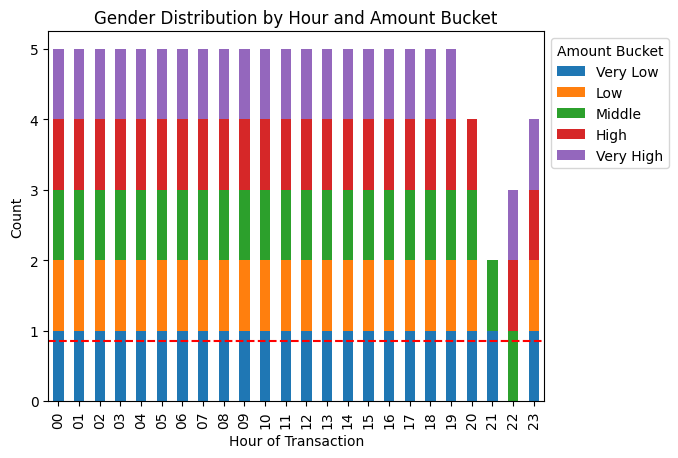

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Разбиение расходов на бакеты
merged_left['amount_bucket'] = pd.qcut(merged_left['amount'], q=5, labels=['Very Low', 'Low', 'Middle', 'High', 'Very High'])

# 2. Присвоение категории 'Income' для неотрицательных трат
merged_left['amount_bucket'] = merged_left['amount_bucket'].cat.add_categories('Income')
merged_left['amount_bucket'] = merged_left['amount_bucket'].fillna('Income')

# 3. Извлечение часа из tr_datetime
merged_left['tr_hour'] = merged_left['tr_datetime'].str.split().str[1].str.split(':').str[0]

# 4. Построение сводной таблицы
pivot_table = pd.pivot_table(merged_left, values='gender', index='tr_hour', columns='amount_bucket', aggfunc='first')

# 5. Визуализация результатов
def plot_pivot_table(pivot_table):
    pivot_table.plot(kind='bar', stacked=True)
    plt.xlabel('Hour of Transaction')
    plt.ylabel('Count')
    plt.title('Gender Distribution by Hour and Amount Bucket')
    plt.legend(title='Amount Bucket', bbox_to_anchor=(1, 1))
    plt.axhline(y=0.85, color='red', linestyle='--')  # Добавление горизонтальной линии на уровне 0.85
    plt.show()

plot_pivot_table(pivot_table)

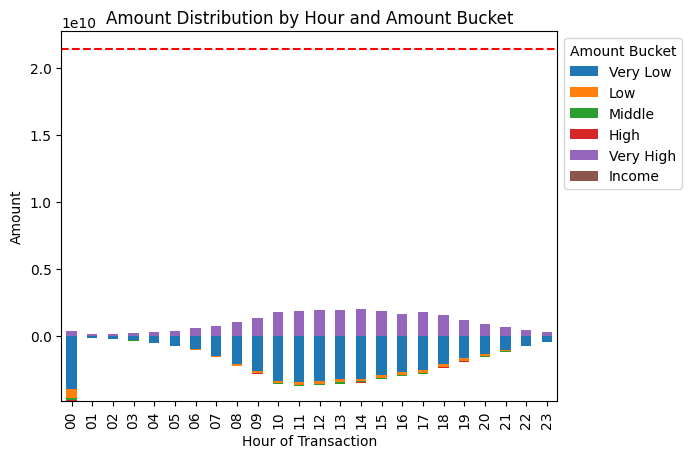

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Разбиение расходов на бакеты
merged_left['amount_bucket'] = pd.qcut(merged_left['amount'], q=5, labels=['Very Low', 'Low', 'Middle', 'High', 'Very High'])

# 2. Присвоение категории 'Income' для неотрицательных трат
merged_left['amount_bucket'] = merged_left['amount_bucket'].cat.add_categories('Income')
merged_left['amount_bucket'] = merged_left['amount_bucket'].fillna('Income')

# 3. Извлечение часа из tr_datetime
merged_left['tr_hour'] = merged_left['tr_datetime'].str.split().str[1].str.split(':').str[0]

# 4. Построение сводной таблицы
pivot_table = pd.pivot_table(merged_left, values='amount', index='tr_hour', columns='amount_bucket', aggfunc='sum')

# 5. Визуализация результатов
def plot_pivot_table(pivot_table):
    pivot_table.plot(kind='bar', stacked=True)
    plt.xlabel('Hour of Transaction')
    plt.ylabel('Amount')
    plt.title('Amount Distribution by Hour and Amount Bucket')
    plt.legend(title='Amount Bucket', bbox_to_anchor=(1, 1))
    plt.axhline(y=pivot_table['Very High'].sum() * 0.85, color='red', linestyle='--')  # Добавление горизонтальной линии на уровне 85% от общей суммы Very High
    plt.show()

plot_pivot_table(pivot_table)

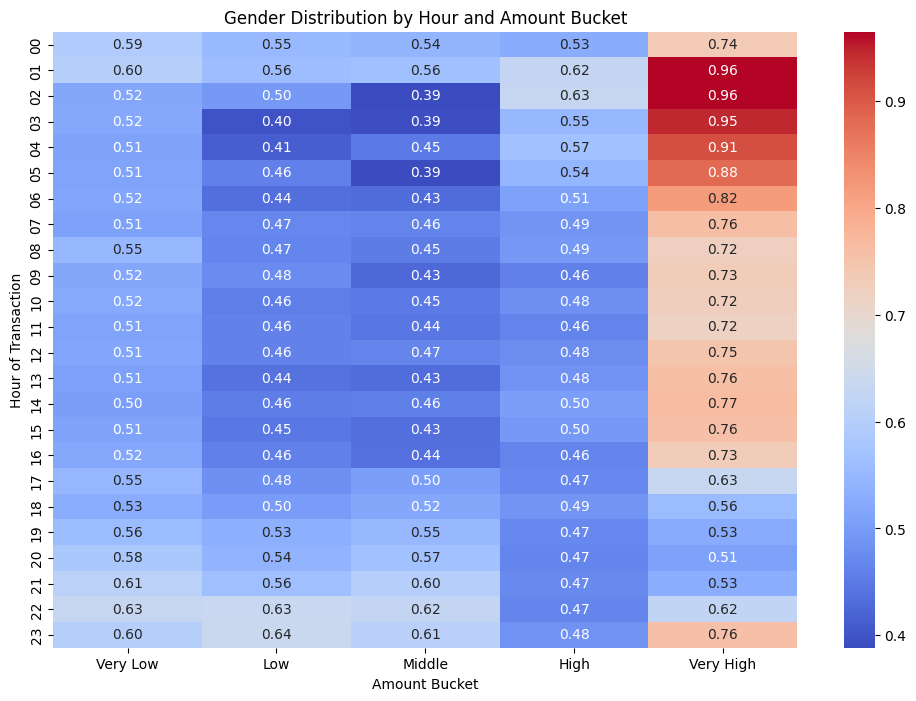

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Разбиение расходов на бакеты
merged_left['amount_bucket'] = pd.qcut(merged_left['amount'], q=5, labels=['Very Low', 'Low', 'Middle', 'High', 'Very High'])

# 2. Присвоение категории 'Income' для неотрицательных трат
merged_left['amount_bucket'] = merged_left['amount_bucket'].cat.add_categories('Income')
merged_left['amount_bucket'] = merged_left['amount_bucket'].fillna('Income')

# 3. Извлечение часа из tr_datetime
merged_left['tr_hour'] = merged_left['tr_datetime'].str.split().str[1].str.split(':').str[0]

# 4. Построение сводной таблицы
pivot_table = pd.pivot_table(merged_left, values='gender', index='tr_hour', columns='amount_bucket')

# 5. Визуализация результатов в виде тепловой карты
def plot_pivot_table_heatmap(pivot_table):
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f")
    plt.xlabel('Amount Bucket')
    plt.ylabel('Hour of Transaction')
    plt.title('Gender Distribution by Hour and Amount Bucket')
    plt.show()

plot_pivot_table_heatmap(pivot_table)

## Задание 5

1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
     1) 2 из полученных MCC-кодов связаны с финансовыми институтами
     2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
     3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
     4) Денежные переводы имеют как минимум 3 явных минимума средних
     5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию. 

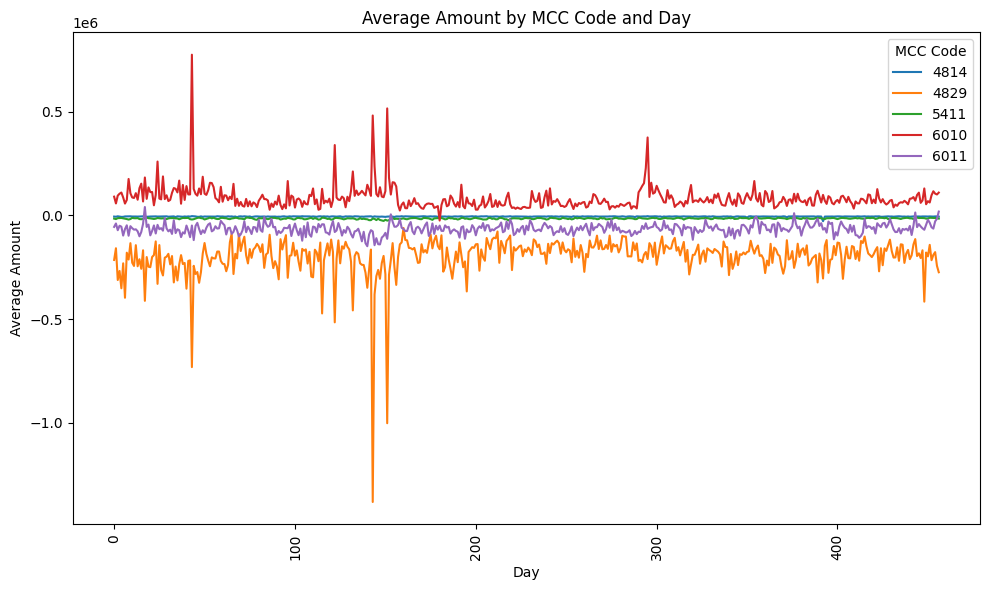

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Изменение типа поля tr_day на int
merged_left['tr_day'] = merged_left['tr_day'].astype(int)

# Выбор MCC кодов, встретившихся более 60000 раз
mcc_counts = merged_left['mcc_code'].value_counts()
mcc_filtered = mcc_counts[mcc_counts > 60000].index.tolist()

# Фильтрация данных по выбранным MCC кодам
filtered_transactions = merged_left[merged_left['mcc_code'].isin(mcc_filtered)]

# Группировка по дню и MCC коду, расчет средней суммы amount
grouped = filtered_transactions.groupby(['tr_day', 'mcc_code'])['amount'].mean().unstack()

# Отрисовка зависимости средних сумм по каждому MCC коду по дням
grouped.plot(figsize=(10, 6))

# Настройка графика
plt.xlabel('Day')
plt.ylabel('Average Amount')
plt.title('Average Amount by MCC Code and Day')
plt.legend(title='MCC Code', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)

# Отображение графика
plt.tight_layout()
plt.show()